In [20]:
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from sklearn.neighbors import KNeighborsClassifier
from playML.metrics import plot_decision_boundary
from playML.Bayers import BayersGN
from playML.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC,SVC
from playML.LDA import LDA
from playML.metrics import plot_decision_boundary_svm
X_train, y_train = np.loadtxt("X_train.csv", delimiter=","),np.loadtxt("y_train.csv", delimiter=",")
X_test, y_test =  np.loadtxt("X_test.csv", delimiter=","), np.loadtxt("y_test.csv", delimiter=",")

In [26]:
standardscaler = StandardScaler()
scaler = standardscaler.fit(X_train)
X_train_std = scaler.transform(X_train)[:,:2]
X_test_std = scaler.transform(X_test)[:,:2]
L_svc = LinearSVC(C=1e9)
L_svc.fit(X_train_std, y_train)
L_svc_acu = L_svc.score(X_test_std,y_test)
L_svc_acu

0.8604651162790697

In [ ]:
svc = SVC(C=1e7, kernel="poly")
svc.fit(X_train_std, y_train)
svc_acu = svc.score(X_test_std,y_test)

In [27]:
g = sum(y_train==1)/len(y_train)
lda = LDA(priors=[g,1-g])
lda.fit(X_train_std, y_train)
lda_acu = lda.score(X_test_std,y_test)
lda_acu

0.8604651162790697

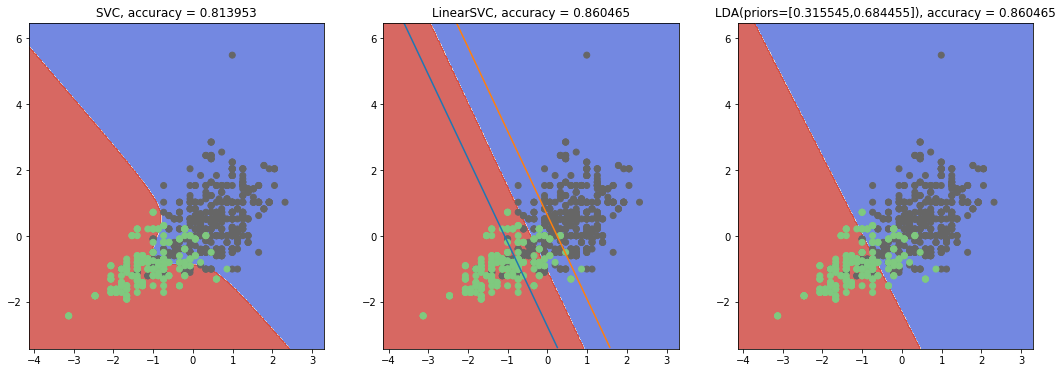

In [25]:
fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot(131)

plot_decision_boundary(ax, svc, X_train_std)
ax.scatter(X_train_std[:,0],
            X_train_std[:,1], c=y_train, cmap=plt.cm.Accent_r)
ax.set_title("SVC, accuracy = %f"%svc_acu)
ax = fig.add_subplot(132)

plot_decision_boundary_svm(ax, L_svc, X_train_std, h=0.02)
ax.scatter(X_train_std[:,0],
            X_train_std[:,1], c=y_train, cmap=plt.cm.Accent_r)
ax.set_title("LinearSVC, accuracy = %f"%L_svc_acu)

ax = fig.add_subplot(133)
plot_decision_boundary(ax, lda, X_train_std)
ax.scatter(X_train_std[:,0],
            X_train_std[:,1], c=y_train, cmap=plt.cm.Accent_r)
ax.set_title("LDA(priors=[%f,%f]), accuracy = %f"%(g,1-g,lda_acu))
plt.show()